In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tower_location = r"/Volumes/Extreme SSD/Data - Location/Hummingbird_Location_Data/A_Cell_Tower_Locations/cell_city_district.txt"

dir_finegrained = "/Volumes/Extreme SSD/Data - Location/Hummingbird_Location_Data/F_Fine_grained_mobility"
finegrained_file = "fine_grained{}.txt"

dir_summary=r'/Volumes/Extreme SSD/Summary_Data/Fine grained/fine_grained16.csv'
summary_file = "fine_grained{}.csv"

dir_harvest_trip='/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/harvest_trips/harvest_trips_2020_16.csv'

dir_holiday_trip='/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/holiday_trips/holiday_trips_2020_16.csv'

dir_final="/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/final.csv"

In [16]:
pd.set_option('display.max_columns', None)

In [22]:
df=pd.read_csv(dir_final)
prefixes = ['scikit', 'bandicoot', 'travel']
cols_to_check = [col for col in df.columns if col.startswith(tuple(prefixes))]
df.dropna(subset=cols_to_check, how='all', inplace=True)
df = df.filter(regex=r'^(?!.*Unnamed).*$', axis=1)

,customer_id,harvest_label,scikit_all_radius_of_gyration_x,scikit_all_2k_radius_of_gyration,scikit_all_random_entropy,scikit_all_uncorrelated_entropy,scikit_all_radius_of_gyration_y,scikit_all_maximum_distance,scikit_all_distance_straight_line,scikit_all_waiting_times,scikit_all_number_of_locations,scikit_all_lat,scikit_all_lng,scikit_all_max_distance_from_home,scikit_all_number_of_visits,scikit_all_location_frequency,scikit_all_at23_radius_of_gyration_x,scikit_all_at23_2k_radius_of_gyration,scikit_all_at23_random_entropy,scikit_all_at23_uncorrelated_entropy,scikit_all_at23_radius_of_gyration_y,scikit_all_at23_maximum_distance,scikit_all_at23_distance_straight_line,scikit_all_at23_waiting_times,scikit_all_at23_number_of_locations,scikit_all_at23_lat,scikit_all_at23_lng,scikit_all_at23_max_distance_from_home,scikit_all_at23_number_of_visits,scikit_all_at23_location_frequency,scikit_weekday_radius_of_gyration_x,scikit_weekday_2k_radius_of_gyration,scikit_weekday_random_entropy,scikit_weekday_uncorrelated_entropy,scikit_weekday_radius_of_gyration_y,scikit_weekday_maximum_distance,scikit_weekday_distance_straight_line,scikit_weekday_waiting_times,scikit_weekday_number_of_locations,scikit_weekday_lat,scikit_weekday_lng,scikit_weekday_max_distance_from_home,scikit_weekday_number_of_visits,scikit_weekday_location_frequency,scikit_day_radius_of_gyration_x,scikit_day_2k_radius_of_gyration,scikit_day_random_entropy,scikit_day_uncorrelated_entropy,scikit_day_radius_of_gyration_y,scikit_day_maximum_distance,scikit_day_distance_straight_line,scikit_day_waiting_times,scikit_day_number_of_locations,scikit_day_lat,scikit_day_lng,scikit_day_max_distance_from_home,scikit_day_number_of_visits,scikit_day_location_frequency,site_id,scikit_night_radius_of_gyration_x,scikit_night_2k_radius_of_gyration,scikit_night_random_entropy,scikit_night_uncorrelated_entropy,scikit_night_radius_of_gyration_y,scikit_night_maximum_distance,scikit_night_distance_straight_line,scikit_night_waiting_times,scikit_night_number_of_locations,scikit_night_lat,scikit_night_lng,scikit_night_max_distance_from_home,scikit_night_number_of_visits,scikit_night_location_frequency,bandicoot_percentage_nocturnal,bandicoot_0,bandicoot_entropy_of_antennas,bandicoot_number_of_antennas,bandicoot_frequent_antennas,scikit_weekend_radius_of_gyration_x,scikit_weekend_2k_radius_of_gyration,scikit_weekend_random_entropy,scikit_weekend_uncorrelated_entropy,scikit_weekend_radius_of_gyration_y,scikit_weekend_maximum_distance,scikit_weekend_distance_straight_line,scikit_weekend_waiting_times,scikit_weekend_number_of_locations,scikit_weekend_lat,scikit_weekend_lng,scikit_weekend_max_distance_from_home,scikit_weekend_number_of_visits,scikit_weekend_location_frequency,travel_random_entropy,travel_radius_of_gyration,travel_num_cities_travelled,travel_num_districts_per_city,travel_cities_travelled,id_2,2016 Total number Population,2016 Total number Population (Male),2016 Total number Population (Female),2015 Total number Population,2015 Total number Population (Male),2015 Total number Population (Female),2014 Total number Population,2014 Total number Population (Male),2014 Total number Population (Female),Generation Z ratio (0-19 years) 2016,Generation Y ratio (20-39 years) 2016,Generation X ratio (40-54 years) 2016,Baby Boomer/Traditional Generation ratio (+55 years) 2016,Generation Z ratio (0-19 years) 2015,Generation Y ratio (20-39 years) 2015,Generation X ratio (40-54 years) 2015,Baby Boomer/Traditional Generation ratio (+55 years) 2015,Generation Z ratio (0-19 years) 2014,Generation Y ratio (20-39 years) 2014,Generation X ratio (40-54 years) 2014,Baby Boomer/Traditional Generation ratio (+55 years) 2014,Average Age 2016,Average Age 2015,Average Age 2014,Age Dependency ratio 2016,Age Dependency ratio 2015,Age Dependency ratio 2014,Never Married ratio 2016,Married ratio 2016,Divorced ratio 2016,Widowed ratio 2016,Never Married ratio 2015,Married ratio 2015,Divorced ratio 2015,Widowed ratio 2015,Nev

In [28]:
columns_to_drop = [col for col in df.columns if df[col].dtype != float]
df.drop(columns=columns_to_drop, inplace=True)


In [30]:
X = df.drop(['harvest_label','customer_id'], axis=1)
y = df['harvest_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline_imb(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      4046
         1.0       0.64      0.96      0.77       443

    accuracy                           0.94      4489
   macro avg       0.82      0.95      0.87      4489
weighted avg       0.96      0.94      0.95      4489



/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
null_counts = df.isnull().sum().sort_values(ascending=False).to_dict()

print(null_counts)


{'scikit_weekday_maximum_distance': 17726, 'scikit_weekday_radius_of_gyration_x': 17115, 'scikit_weekday_2k_radius_of_gyration': 17115, 'scikit_weekday_random_entropy': 17115, 'scikit_weekday_uncorrelated_entropy': 17115, 'scikit_weekday_radius_of_gyration_y': 17115, 'scikit_weekday_distance_straight_line': 17115, 'scikit_weekday_number_of_locations': 17115, 'scikit_weekday_lat': 17115, 'scikit_weekday_lng': 17115, 'scikit_weekday_max_distance_from_home': 17115, 'scikit_weekday_number_of_visits': 17115, 'scikit_weekday_location_frequency': 17115, 'scikit_week_maximum_distance': 11874, 'scikit_week_location_frequency': 10441, 'scikit_week_2k_radius_of_gyration': 10441, 'scikit_week_random_entropy': 10441, 'scikit_week_uncorrelated_entropy': 10441, 'scikit_week_radius_of_gyration_y': 10441, 'scikit_week_distance_straight_line': 10441, 'scikit_week_number_of_locations': 10441, 'scikit_week_lat': 10441, 'scikit_week_lng': 10441, 'scikit_week_max_distance_from_home': 10441, 'scikit_week_num

Feature: scikit_all_radius_of_gyration_x, Score: 0.36800
Feature: scikit_all_2k_radius_of_gyration, Score: 0.29078
Feature: scikit_all_random_entropy, Score: -0.84247
Feature: scikit_all_uncorrelated_entropy, Score: -0.40022
Feature: scikit_all_radius_of_gyration_y, Score: 0.36800
Feature: scikit_all_maximum_distance, Score: 0.07760
Feature: scikit_all_distance_straight_line, Score: 0.73445
Feature: scikit_all_number_of_locations, Score: 1.02373
Feature: scikit_all_lat, Score: 0.06342
Feature: scikit_all_lng, Score: 1.15130
Feature: scikit_all_max_distance_from_home, Score: -0.56604
Feature: scikit_all_number_of_visits, Score: -0.23727
Feature: scikit_all_location_frequency, Score: -0.34444
Feature: scikit_all_at23_radius_of_gyration_x, Score: 0.03933
Feature: scikit_all_at23_2k_radius_of_gyration, Score: -0.22847
Feature: scikit_all_at23_random_entropy, Score: -0.01562
Feature: scikit_all_at23_uncorrelated_entropy, Score: -0.25922
Feature: scikit_all_at23_radius_of_gyration_y, Score: 

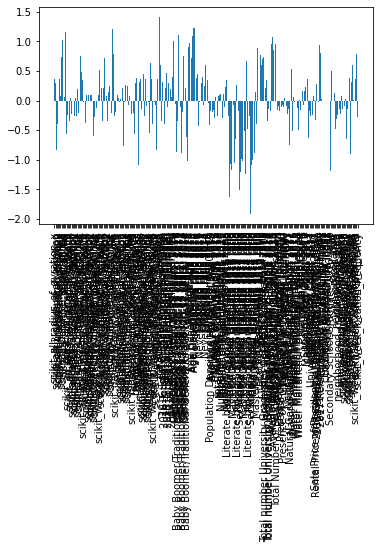

In [34]:
log_reg = model.named_steps['logisticregression']
importance = log_reg.coef_[0]


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i],v))

# plot feature importance
plt.bar(X.columns, importance)
plt.xticks(rotation=90)  # this makes the feature names on x-axis vertical to avoid overlapping.
plt.show()


In [4]:
# Define the directories
indicator_dir = '/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/individual_features/individual_indicators/'
harvest_dir = '/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/harvest_trips/'
neighborhood_indicators_file = '/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/place_features/neighborhood_indicators.csv'

# Get the list of all files in harvest_dir directory
all_harvest_files = os.listdir(harvest_dir)

# Filter to get only .csv files
harvest_files = [os.path.join(harvest_dir, file) for file in all_harvest_files if file.endswith('.csv')]

# Dataframe to hold all merged data
final_df = pd.DataFrame()

# Loop over each unique year
    # Filter harvest_files for the specific year
year_harvest_files = [file for file in harvest_files if file.endswith("15.csv")]

harvest_df = pd.DataFrame()

for file in year_harvest_files:
    if '/._' not in file:
        print(file)
        temp_df = pd.read_csv(file)
        label = 0 if 'non_movers' in file else 1
        temp_df['harvest_label'] = label
        harvest_df = pd.concat([harvest_df, temp_df])

    # Get the list of all files in indicator_dir directory
    all_indicator_files = os.listdir(indicator_dir)

    # Filter to get only .csv files for the specific year
year_indicator_files = [os.path.join(indicator_dir, file) for file in all_indicator_files if file.endswith('_15'+'.csv')]



/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/harvest_trips/harvest_trips_2020_15.csv
/Volumes/Extreme SSD/MPD_based_indicators_of_migration/Seasonal_migration/harvest_trips/non_movers_2020_15.csv


In [ ]:
def read_fine_grained(fine_grained_location):
    df = pd.read_csv(fine_grained_location,
                        sep="|", skiprows = 0,
                        header=0, encoding ='ISO-8859-1')
    df = df.drop(['Unnamed: 0', 'Unnamed: 5'], axis = 1)
    df = df.rename(columns=lambda x: x.strip())
    for i in df.columns:
        df[i] = df[i].astype(str)
    df = df.apply(lambda x: x.str.strip())
    df = df.iloc[1: , :]

    for i in df.columns[1:4]:
        df[i] = df[i].astype(int)
    #df['time'] =  pd.to_datetime(df['time'], format='%Y-%M-%d %H')
    return df

def read_tower_data(tower_location):

    tower = pd.read_csv(
        tower_location,
        sep="|",
        header=0, encoding='ISO-8859-1')
    tower = tower.drop(['Unnamed: 0', 'Unnamed: 4'], axis=1)
    tower = tower.iloc[1:, :]
    tower = tower.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    tower = tower.rename(columns=lambda x: x.strip())
    tower = tower.rename(columns={'matcher': 'site_id'})
    tower['site_id'] = tower['site_id'].astype(int)
    #print('There are {} cell towers in the dataset'.format(df.site_id.nunique()))
    return tower

df_tower= read_tower_data(tower_location)
fine_name = finegrained_file.format(16)
fine_path = os.path.join(dir_finegrained, fine_name)
    
sum_name = summary_file.format(16) 
sum_path =os.path.join(dir_summary, sum_name)


In [ ]:
df_finegrained= read_fine_grained(fine_path)

In [ ]:
df_finegrained['time'] = pd.to_datetime(df_finegrained['time'])

# Filter the data to include only rows with a time of 23:00
#df_finegrained = df_finegrained[df_finegrained['time'].dt.hour == 23]

# Create a new column containing only the date (without the time)
df_finegrained['date'] = df_finegrained['time'].dt.date

# Group the data by customer_id and date, and count the unique dates for each customer
result_all = df_finegrained.groupby('customer_id')['date'].nunique().reset_index(name='days_with_signal_at_23')


In [ ]:
result_all = df_finegrained.groupby(['customer_id','date'])['time'].count().reset_index(name='days_with_signal_at_23')

In [ ]:
result

In [ ]:
result_all#[result_all['customer_id']==14948]

In [ ]:
df_harvest_trip=pd.read_csv(dir_harvest_trip)
df_holiday_trip=pd.read_csv(dir_holiday_trip)
df_sum=pd.read_csv(dir_summary)

In [ ]:
df_mig_harvest=df_sum[df_sum['customer_id'].isin(df_harvest_trip['customer_id'].unique().tolist())==True].reset_index(drop=True)

df_mig_holiday=df_sum[df_sum['customer_id'].isin(df_holiday_trip['customer_id'].unique().tolist())==True].reset_index(drop=True)



# Holiday trips

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a = df_mig_holiday[(df_mig_holiday['segment']!=14)&(df_mig_holiday['segment']!=13)&\
                  (df_mig_holiday['segment']!=1)&(df_mig_holiday['segment']!=12)]
# Assuming your DataFrame is named df_sum_mig and has columns 'customer_id' and 'segment'
segment_counts = a['segment'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.bar(segment_counts.index, segment_counts.values)

# Adding labels and title
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment')

# Displaying the bar chart
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a = df_mig_holiday[(df_mig_holiday['segment']==14)|(df_mig_holiday['segment']==13)|\
                  (df_mig_holiday['segment']==1)|(df_mig_holiday['segment']==12)].reset_index(drop=True)
# Assuming your DataFrame is named df_sum_mig and has columns 'customer_id' and 'segment'
segment_counts = a['segment'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.bar(segment_counts.index, segment_counts.values)

# Adding labels and title
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment')

# Displaying the bar chart
plt.show()


# Harvest trips

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

b = df_mig_harvest[(df_mig_harvest['segment']!=14)&(df_mig_harvest['segment']!=13)&\
                  (df_mig_harvest['segment']!=1)&(df_mig_harvest['segment']!=12)]

# Assuming your DataFrame is named df_sum_mig and has columns 'customer_id' and 'segment'
segment_counts = b['segment'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.bar(segment_counts.index, segment_counts.values)

# Adding labels and title
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment')

# Displaying the bar chart
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a = df_mig_harvest[(df_mig_harvest['segment']==14)|(df_mig_harvest['segment']==13)|\
                  (df_mig_harvest['segment']==1)|(df_mig_harvest['segment']==12)].reset_index(drop=True)
# Assuming your DataFrame is named df_sum_mig and has columns 'customer_id' and 'segment'
segment_counts = a['segment'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.bar(segment_counts.index, segment_counts.values)

# Adding labels and title
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment')

# Displaying the bar chart
plt.show()
